## DIPLOMADO: TÉCNICAS ESTADÍSTICAS Y MINERÍA DE DATOS.

## MÓDULO 4


## PROYECTO FINAL


##### ALUMNAS:
##### ARRIAGA MEJIA DENI CONCEPCION
##### FUENTES JURADO JAAZIEL MADAI
##### MEDINA LOZANO NEREYDA
##### OCAÑA MORALES LETICIA

##### PROFESOR: JACOBO GERARDO GONZÁLEZ LEÓN
##### FECHA DE ENTREGA: 04/04/2020

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import missingno as msno
%matplotlib inline

In [2]:
airbnb = pd.read_csv('airmx.csv')
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,14714,Private room c/ bathroom . Colonia Juarez.,57785,Diego,NaN,Cuauhtémoc,19.43035,-99.15511,Private room,478,2,0,NaN,NaN,2,327
1,22787,"Sunny suite w/ queen size bed, inside boutique...",87973,Diego,NaN,Cuauhtémoc,19.44076,-99.16324,Private room,1969,1,57,2019-05-27,0.52,9,355
2,33681,Couple of Rooms,145672,Edubiel,NaN,Tlalpan,19.27215,-99.21848,Private room,1740,1,0,NaN,NaN,1,365
3,35797,Villa Dante,153786,Dici,NaN,Cuajimalpa de Morelos,19.38399,-99.27335,Entire home/apt,3823,1,0,NaN,NaN,2,363
4,44616,CONDESA HAUS B&B,196253,Condesa Haus Bed & Breakfast CDMX,NaN,Cuauhtémoc,19.41006,-99.17645,Private room,1893,1,39,2019-05-02,0.42,10,334


In [3]:
columns = ['neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'calculated_host_listings_count']

airbnb = airbnb[columns]
airbnb.rename({'neighbourhood':'Neighborhood', 
            'latitude':'Latitude', 
            'longitude': 'Longitude', 
            'room_type':'Room Type', 
            'price':'Price(MXN)',
            'calculated_host_listings_count':'Rent Frequency'}, axis = 1, inplace = True)

print(airbnb.shape)
airbnb.head()

(19030, 6)


,Neighborhood,Latitude,Longitude,Room Type,Price(MXN),Rent Frequency
0,Cuauhtémoc,19.43035,-99.15511,Private room,478,2
1,Cuauhtémoc,19.44076,-99.16324,Private room,1969,9
2,Tlalpan,19.27215,-99.21848,Private room,1740,1
3,Cuajimalpa de Morelos,19.38399,-99.27335,Entire home/apt,3823,2
4,Cuauhtémoc,19.41006,-99.17645,Private room,1893,10


## 1. Limpieza de los datos

In [4]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19030 entries, 0 to 19029
Data columns (total 6 columns):
Neighborhood      19030 non-null object
Latitude          19030 non-null float64
Longitude         19030 non-null float64
Room Type         19030 non-null object
Price(MXN)        19030 non-null int64
Rent Frequency    19030 non-null int64
dtypes: float64(2), int64(2), object(2)
memory usage: 892.2+ KB


In [5]:
airbnb.shape

(19030, 6)

In [6]:
airbnb.columns.values.tolist()
airbnb.dtypes

Neighborhood       object
Latitude          float64
Longitude         float64
Room Type          object
Price(MXN)          int64
Rent Frequency      int64
dtype: object

In [7]:
airbnb.isnull().any().any()

False

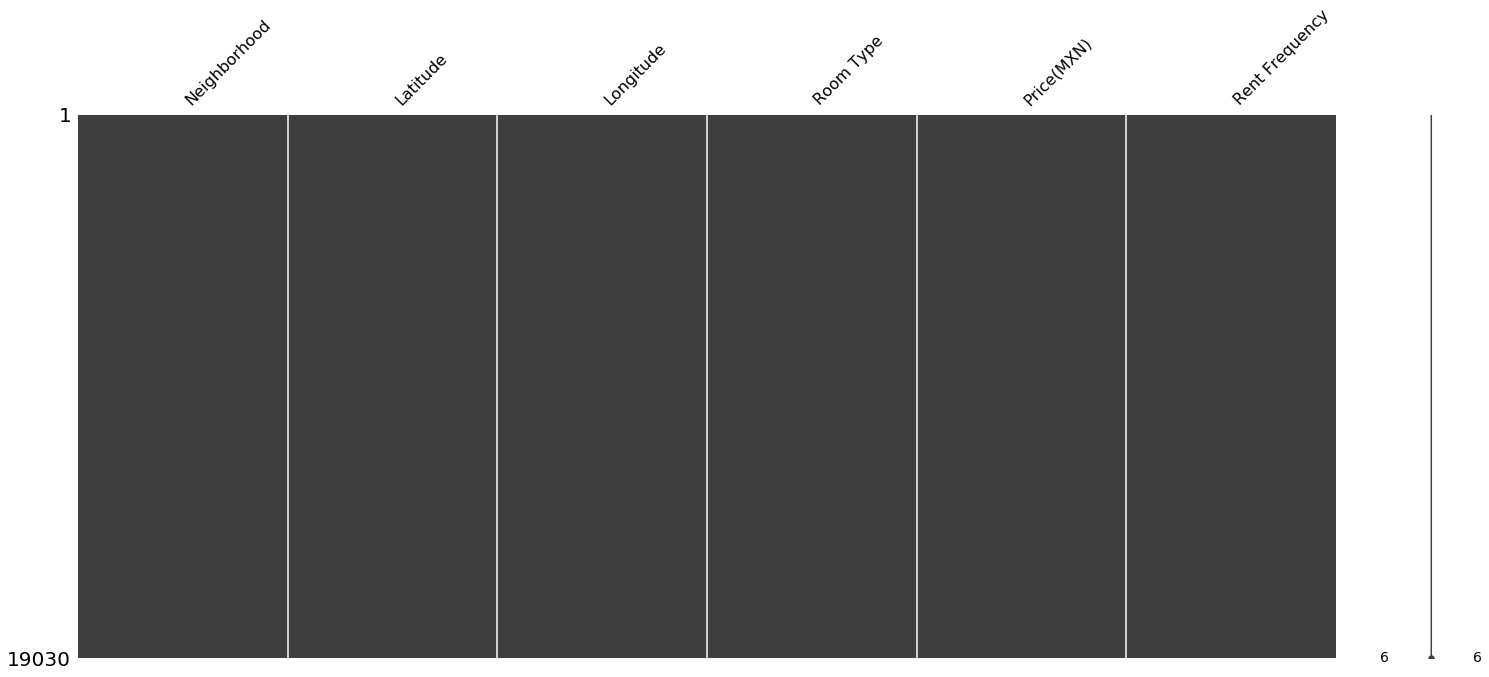

In [8]:
msno.matrix(airbnb)

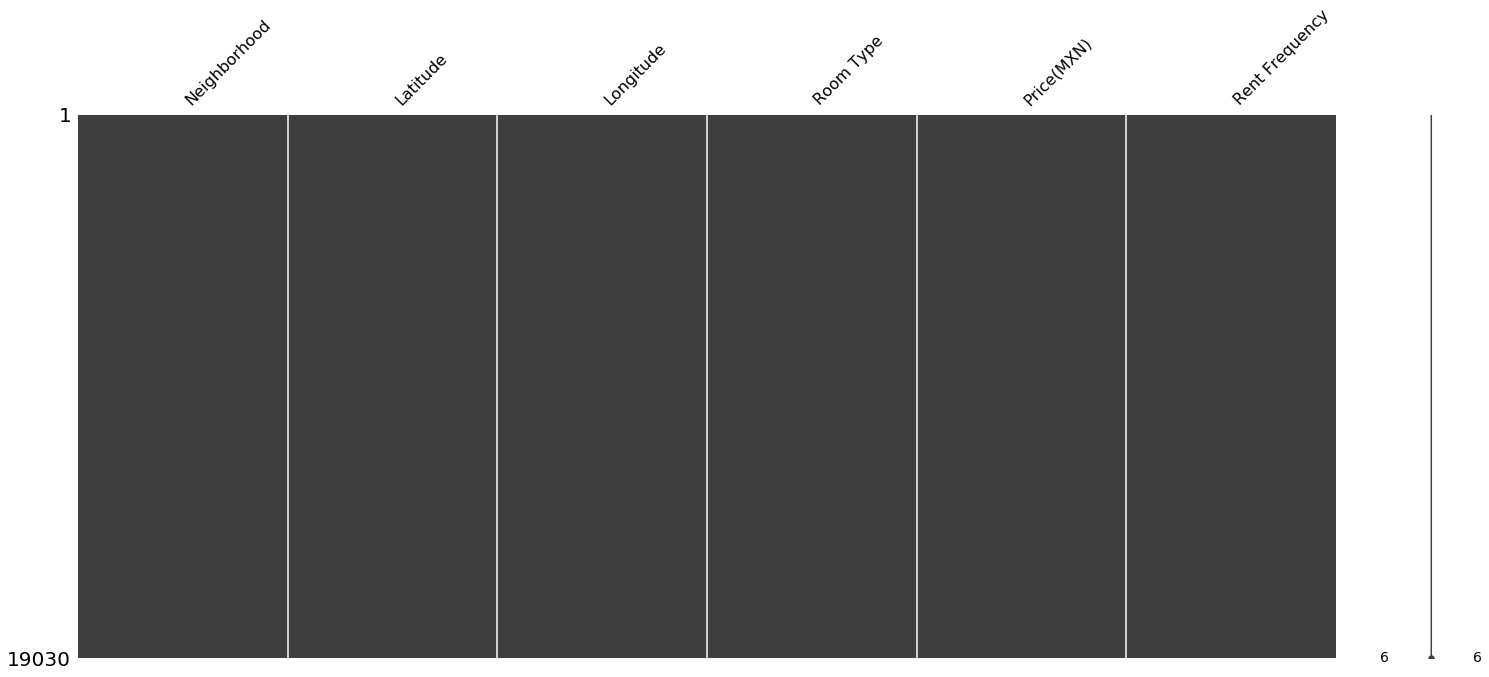

In [9]:
airbnb.replace({' ': np.nan}, inplace=True)
msno.matrix(airbnb)

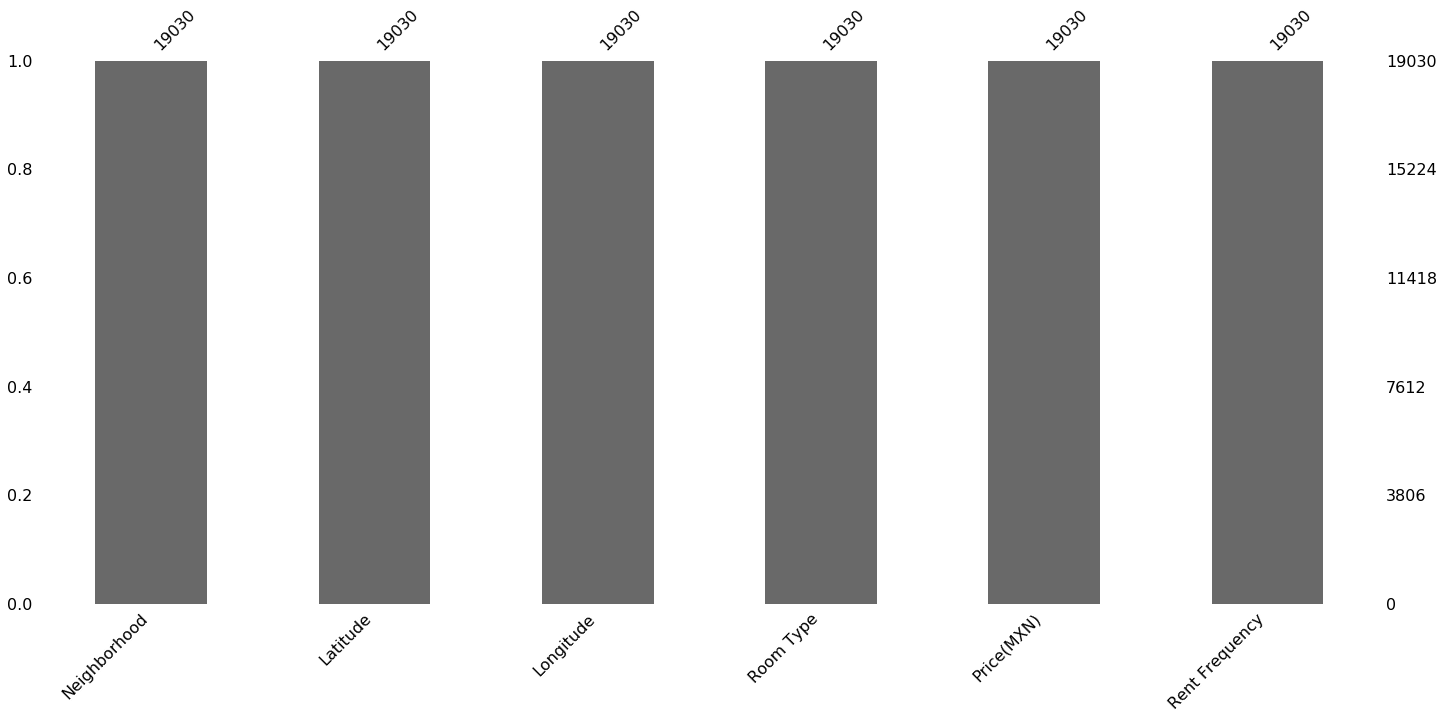

In [10]:
msno.bar(airbnb)

## 2. Recolección de los datos

In [11]:
from sklearn.model_selection import train_test_split
x_train ,air = train_test_split(airbnb,test_size=0.03, random_state=18)

print(air.shape)
air.head()

(571, 6)


,Neighborhood,Latitude,Longitude,Room Type,Price(MXN),Rent Frequency
8080,Cuauhtémoc,19.42388,-99.15489,Entire home/apt,1396,32
12395,Tlalpan,19.31051,-99.22104,Entire home/apt,5200,3
9320,Venustiano Carranza,19.42223,-99.09048,Private room,459,11
5574,Cuauhtémoc,19.43541,-99.14493,Entire home/apt,822,5
155,Cuauhtémoc,19.42984,-99.16936,Entire home/apt,956,10


In [12]:
room = pd.get_dummies(air[['Room Type']], prefix="", prefix_sep="")
air = air.drop('Room Type',1)
air = air.join(room)
air

,Neighborhood,Latitude,Longitude,Price(MXN),Rent Frequency,Entire home/apt,Private room,Shared room
8080,Cuauhtémoc,19.42388,-99.15489,1396,32,1,0,0
12395,Tlalpan,19.31051,-99.22104,5200,3,1,0,0
9320,Venustiano Carranza,19.42223,-99.09048,459,11,0,1,0
5574,Cuauhtémoc,19.43541,-99.14493,822,5,1,0,0
155,Cuauhtémoc,19.42984,-99.16936,956,10,1,0,0
13269,Cuauhtémoc,19.41209,-99.18016,401,3,0,1,0
14872,Benito Juárez,19.38897,-99.17674,803,1,0,1,0
12974,Coyoacán,19.31341,-99.15760,249,2,0,1,0
11510,Cuauhtémoc,19.43425,-99.15653,421,11,0,1,0
8677,Miguel Hidalgo,19.40626,-99.18856,1090,1,1,0,0


In [17]:
pip search geopy

tornado-geopy (0.1.0)         - tornado-geopy is an asynchronous version of the awesome geopy library.
geopy (1.21.0)                - Python Geocoding Toolbox
swisslandstats-geopy (0.7.3)  - Python for the land statistics datasets from the SFSO
pivotal-geopy (1.0.0)         - Python Geocoding Toolbox
Note: you may need to restart the kernel to use updated packages.


In [19]:
!pip install geopy

In [20]:
from geopy.geocoders import Nominatim

In [21]:
address = 'Mexico City, MX'
geolocator = Nominatim(user_agent="mx_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Mexico City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Mexico City are 19.4326296, -99.1331785.


In [23]:
!pip install folium
import pandas as pd
import folium

In [24]:
# Crear un mapa de la Ciudad de México usando valores de latitud y longitud
map_mx = folium.Map(location=[latitude, longitude], zoom_start=11)

# agregar marcadores al mapa
for lat, lng, neighborhood in zip(air['Latitude'], air['Longitude'], air['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_mx)  
    
map_mx

## Exploración de los negocios alrededor 

In [25]:
CLIENT_ID = 'H5SMCQKC15A4TV2QVM4CSS1RPI4Y1P5NT0GTAQQCRU0PQXVK' # your Foursquare ID
CLIENT_SECRET = 'MTSMVHQQE2KGGBPM5AOQKKAVTETHEWGQJHD0QGBCPTW3IUXA' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 300 # limit of number of venues returned by Foursquare API

radius = 1500 # define radius

In [26]:
import requests

In [27]:
def getNearbyVenues(names, latitudes, longitudes, radius=750):
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)       
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, VERSION, lat, lng, radius, LIMIT)
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']   
        # return only relevant information for each nearby venue
        venues_list.append([(name, lat, lng, v['venue']['name'], v['venue']['location']['lat'], v['venue']['location']['lng'],  v['venue']['categories'][0]['name']) for v in results])
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 'Neighborhood Latitude', 'Neighborhood Longitude', 'Venue', 'Venue Latitude', 'Venue Longitude', 'Venue Category']
    return(nearby_venues)

In [28]:
mx_venues = getNearbyVenues(names=air['Neighborhood'], latitudes=air['Latitude'], longitudes=air['Longitude'])

Cuauhtémoc
Tlalpan
Venustiano Carranza
Cuauhtémoc
Cuauhtémoc
Cuauhtémoc
Benito Juárez
Coyoacán
Cuauhtémoc
Miguel Hidalgo
Benito Juárez
Cuauhtémoc
Cuauhtémoc
Benito Juárez
Coyoacán
Cuauhtémoc
Cuauhtémoc
Benito Juárez
Cuauhtémoc
Benito Juárez
Álvaro Obregón
Cuauhtémoc
Cuauhtémoc
Benito Juárez
Cuauhtémoc
Cuauhtémoc
Cuauhtémoc
Cuauhtémoc
Venustiano Carranza
Álvaro Obregón
Tlalpan
Venustiano Carranza
Miguel Hidalgo
Cuauhtémoc
Cuauhtémoc
Miguel Hidalgo
Cuauhtémoc
Cuauhtémoc
Tlalpan
Miguel Hidalgo
Cuauhtémoc
Tlalpan
Álvaro Obregón
Cuauhtémoc
Miguel Hidalgo
La Magdalena Contreras
Cuauhtémoc
Cuauhtémoc
Benito Juárez
Miguel Hidalgo
Cuauhtémoc
Cuauhtémoc
Gustavo A. Madero
Miguel Hidalgo
Cuauhtémoc
Cuauhtémoc
Miguel Hidalgo
Cuauhtémoc
Miguel Hidalgo
Tlalpan
Cuauhtémoc
Coyoacán
Cuauhtémoc
Cuauhtémoc
Miguel Hidalgo
Álvaro Obregón
Miguel Hidalgo
Cuauhtémoc
Benito Juárez
Cuauhtémoc
Benito Juárez
Miguel Hidalgo
Miguel Hidalgo
Cuauhtémoc
Benito Juárez
Benito Juárez
Benito Juárez
Benito Juárez
Miguel Hid

In [29]:
print(mx_venues.shape)
mx_venues.head()

(50404, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Cuauhtémoc,19.42388,-99.15489,Frody Roma,19.422273,-99.155733,Ice Cream Shop
1,Cuauhtémoc,19.42388,-99.15489,La Obra Que Sale Mal,19.425206,-99.154764,Theater
2,Cuauhtémoc,19.42388,-99.15489,Plaza Romita,19.423235,-99.155362,Plaza
3,Cuauhtémoc,19.42388,-99.15489,Ocho Tres Cinco,19.422368,-99.155479,Venezuelan Restaurant
4,Cuauhtémoc,19.42388,-99.15489,Arroces El Baby Face,19.425080,-99.152830,Mexican Restaurant


In [30]:
m = air.groupby('Neighborhood').mean()[['Price(MXN)','Rent Frequency']]
m

,Price(MXN),Rent Frequency
Neighborhood,,
Azcapotzalco,1097.571429,1.428571
Benito Juárez,880.695238,1.990476
Coyoacán,617.142857,3.232143
Cuajimalpa de Morelos,1096.875000,2.000000
Cuauhtémoc,1565.620536,4.915179
Gustavo A. Madero,275.400000,5.800000
Iztacalco,3326.250000,5.000000
Iztapalapa,216.666667,2.333333
La Magdalena Contreras,549.500000,1.750000


In [31]:
v = mx_venues.groupby('Neighborhood').count()
v = pd.DataFrame(v.rename({'Venue':"Venue's Density"},axis=1)["Venue's Density"]).reset_index()
v

,Neighborhood,Venue's Density
0,Azcapotzalco,386
1,Benito Juárez,10267
2,Coyoacán,4265
3,Cuajimalpa de Morelos,514
4,Cuauhtémoc,21995
5,Gustavo A. Madero,326
6,Iztacalco,255
7,Iztapalapa,89
8,La Magdalena Contreras,189
9,Miguel Hidalgo,8190


## Data Preparation

In [32]:
# one hot encoding
mx_onehot = pd.get_dummies(mx_venues[['Venue Category']], prefix="", prefix_sep="")

# agregue la columna de vecindario, precio y frecuencia de renta al marco de datos
mx_onehot['Neighborhood'] = mx_venues['Neighborhood']
mx_onehot['Latitude'] = mx_venues['Neighborhood Latitude']
mx_onehot['Longitude'] = mx_venues['Neighborhood Longitude']
mx_onehot = mx_onehot.merge(air, on = ['Latitude','Longitude']) 

# mover la columna del vecindario a la primera columna
fixed_columns = [mx_onehot.columns[-6]] + [mx_onehot.columns[-5]] +  [mx_onehot.columns[-4]] + [mx_onehot.columns[-3]] + [mx_onehot.columns[-2]] + [mx_onehot.columns[-1]] + list(mx_onehot.columns[:-8])
mx_onehot = mx_onehot[fixed_columns]
mx_onehot.drop('Neighborhood_x', axis = 1, inplace = True)
mx_onehot.rename({'Neighborhood_y':'Neighborhood'}, axis = 1, inplace = True)
print(mx_onehot.shape)
mx_onehot.head()

(50404, 435)


,Neighborhood,Price(MXN),Rent Frequency,Entire home/apt,Private room,Shared room,ATM,Accessories Store,Adult Boutique,Advertising Agency,African Restaurant,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Amphitheater,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auto Garage,Auto Workshop,Automotive Shop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Belgian Restaurant,Big Box Store,Bike Rental / Bike Share,Bike Trail,Bistro,Board Shop,Bookstore,Botanero,Boutique,Bowling Alley,Bowling Green,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Buffet,Building,Burger Joint,Burrito Place,Bus Station,Bus Stop,Business Center,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Campground,Candy Store,Cantonese Restaurant,Car Wash,Caribbean Restaurant,Casino,Castle,Cave,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Circus,City Hall,Clothing Store,Cocktail Bar,Coffee Shop,College Academic Building,College Administrative Building,College Arts Building,College Auditorium,College Basketball Court,College Bookstore,College Cafeteria,College Classroom,College Football Field,College Gym,College History Building,College Library,College Quad,College Soccer Field,College Stadium,College Theater,Colombian Restaurant,Comedy Club,Comfort Food Restaurant,Comic Shop,Community Center,Concert Hall,Construction & Landscaping,Convenience Store,Convention Center,Cosmetics Shop,Costume Shop,Country Dance Club,Coworking Space,Creperie,Cuban Restaurant,Cultural Center,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distillery,Distribution Center,Dive Bar,Dive Shop,Doctor's Office,Dog Run,Donut Shop,Drive-in Theater,Drugstore,Dry Cleaner,Duty-free Shop,Eastern European Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Event Service,Event Space,Exhibit,Eye Doctor,Fabric Shop,Factory,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Festival,Field,Film Studio,Fire Station,Fish & Chips Shop,Fish Market,Flea Market,Floating Market,Flower Shop,Fondue Restaurant,Food,Food & Drink Shop,Food Court,Food Service,Food Stand,Food Truck,Football Stadium,Forest,Fountain,Frame Store,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General College & University,General Entertainment,German Restaurant,Gift Shop,Go Kart Track,Golf Course,Golf Driving Range,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Herbs & Spices Store,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hospital,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Housing Development,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indoor Play Area,Insurance Office,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Kitchen Supply Store,Korean Restaurant,Laser Tag,Latin American Restaurant,Laundromat,Laundry Service,Lawyer,Leather Goods Store,Lebanese Restaurant,Library,Lighthouse,Lingerie Store,Liquor Store,Locksmith,Lounge,Luggage Store,Market,Martial Arts Dojo,Massage Studio,Medical Center,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Middle School,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Mobility Store,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motel,Motorcycle Shop,Mountain,Mov

In [47]:
mx_grouped = mx_onehot.groupby('Neighborhood').agg({'Price(MXN)':'mean', 'Rent Frequency' :'sum','Entire home/apt' :'sum','Private room' :'sum','Shared room' :'sum',
'ATM' :'sum','Accessories Store' :'sum','Adult Boutique' :'sum','Advertising Agency' :'sum','African Restaurant' :'sum','Airport' :'sum','Airport Lounge' :'sum','Airport Service' :'sum','Airport Terminal' :'sum','American Restaurant' :'sum','Amphitheater' :'sum','Antique Shop' :'sum','Arcade' :'sum','Arepa Restaurant' :'sum','Argentinian Restaurant' :'sum','Art Gallery' :'sum','Art Museum' :'sum','Arts & Crafts Store' :'sum','Arts & Entertainment' :'sum','Asian Restaurant' :'sum','Athletics & Sports' :'sum','Auto Garage' :'sum','Auto Workshop' :'sum','Automotive Shop' :'sum','BBQ Joint' :'sum','Baby Store' :'sum','Bagel Shop' :'sum','Bakery' :'sum','Bar' :'sum','Baseball Field' :'sum','Baseball Stadium' :'sum','Basketball Court' :'sum','Bed & Breakfast' :'sum','Beer Bar' :'sum','Beer Garden' :'sum','Beer Store' :'sum','Belgian Restaurant' :'sum','Big Box Store' :'sum','Bike Rental / Bike Share' :'sum','Bike Trail' :'sum','Bistro' :'sum','Board Shop' :'sum','Bookstore' :'sum','Botanero' :'sum','Boutique' :'sum','Bowling Alley' :'sum','Bowling Green' :'sum','Boxing Gym' :'sum','Brazilian Restaurant' :'sum','Breakfast Spot' :'sum','Brewery' :'sum','Bridal Shop' :'sum','Bubble Tea Shop' :'sum','Buffet' :'sum','Building' :'sum','Burger Joint' :'sum','Burrito Place' :'sum', 'Bus Station' :'sum','Bus Stop' :'sum','Business Center' :'sum','Business Service' :'sum','Butcher' :'sum','Cafeteria' :'sum','Café' :'sum','Cajun / Creole Restaurant' :'sum','Camera Store' :'sum','Campground' :'sum','Candy Store' :'sum','Cantonese Restaurant' :'sum','Car Wash' :'sum','Caribbean Restaurant' :'sum','Casino' :'sum','Castle' :'sum','Cave' :'sum','Cheese Shop' :'sum','Chinese Restaurant' :'sum','Chocolate Shop' :'sum','Church' :'sum','Circus' :'sum','City Hall' :'sum','Clothing Store' :'sum','Cocktail Bar' :'sum','Coffee Shop' :'sum','College Academic Building' :'sum','College Administrative Building' :'sum','College Arts Building' :'sum','College Auditorium' :'sum','College Basketball Court' :'sum','College Bookstore' :'sum','College Cafeteria' :'sum','College Classroom' :'sum','College Football Field' :'sum','College Gym' :'sum','College History Building' :'sum','College Library' :'sum','College Quad' :'sum','College Soccer Field' :'sum','College Stadium' :'sum','College Theater' :'sum','Colombian Restaurant' :'sum','Comedy Club' :'sum','Comfort Food Restaurant' :'sum','Comic Shop' :'sum','Community Center' :'sum','Concert Hall' :'sum','Construction & Landscaping' :'sum','Convenience Store' :'sum','Convention Center' :'sum','Cosmetics Shop' :'sum','Costume Shop' :'sum','Country Dance Club' :'sum','Coworking Space' :'sum','Creperie' :'sum','Cuban Restaurant' :'sum','Cultural Center' :'sum','Cupcake Shop' :'sum','Cycle Studio' :'sum','Dance Studio' :'sum','Deli / Bodega' :'sum','Department Store' :'sum','Design Studio' :'sum','Dessert Shop' :'sum','Diner' :'sum','Discount Store' :'sum','Distillery' :'sum','Distribution Center' :'sum','Dive Bar' :'sum',"Doctor's Office" :'sum','Dog Run' :'sum','Donut Shop' :'sum','Drive-in Theater' :'sum','Drugstore' :'sum','Dry Cleaner' :'sum','Duty-free Shop' :'sum','Eastern European Restaurant' :'sum','Electronics Store' :'sum','Empanada Restaurant' :'sum','English Restaurant' :'sum','Event Service' :'sum','Event Space' :'sum','Exhibit' :'sum','Eye Doctor' :'sum','Fabric Shop' :'sum','Factory' :'sum','Falafel Restaurant' :'sum','Farm' :'sum','Farmers Market' :'sum','Fast Food Restaurant' :'sum','Festival' :'sum','Field' :'sum','Film Studio' :'sum','Fire Station' :'sum','Fish & Chips Shop' :'sum','Fish Market' :'sum','Flea Market' :'sum','Floating Market' :'sum','Flower Shop' :'sum','Food' :'sum','Food & Drink Shop' :'sum','Food Court' :'sum','Food Service' :'sum','Food Stand' :'sum','Food Truck' :'sum','Football Stadium' :'sum','Forest' :'sum','Fountain' :'sum','Frame Store' :'sum','French Restaurant':'sum','Fried Chicken Joint' :'sum','Frozen Yogurt Shop':'sum','Fruit & Vegetable Store' :'sum','Furniture / Home Store':'sum','Gaming Cafe' :'sum','Garden' :'sum','Garden Center' :'sum','Gas Station' :'sum','Gastropub' :'sum','Gay Bar' :'sum','General College & University' :'sum','General Entertainment' :'sum','German Restaurant' :'sum','Gift Shop' :'sum','Go Kart Track' :'sum','Golf Course' :'sum','Golf Driving Range' :'sum','Gourmet Shop' :'sum','Government Building' :'sum','Greek Restaurant' :'sum','Grocery Store' :'sum','Gym' :'sum','Gym / Fitness Center' :'sum','Gym Pool' :'sum','Gymnastics Gym' :'sum','Hardware Store' :'sum','Hawaiian Restaurant' :'sum','Health & Beauty Service' :'sum','Health Food Store' :'sum','Herbs & Spices Store' :'sum','Historic Site' :'sum','History Museum' :'sum','Hobby Shop' :'sum' ,'Hookah Bar' :'sum','Hospital' :'sum','Hostel' :'sum','Hot Dog Joint' :'sum','Hotel' :'sum','Hotel Bar' :'sum','Housing Development' :'sum','IT Services' :'sum','Ice Cream Shop' :'sum','Indian Restaurant' :'sum','Indoor Play Area' :'sum','Insurance Office' :'sum','Irish Pub' :'sum','Italian Restaurant' :'sum','Japanese Restaurant' :'sum','Jazz Club' :'sum','Jewelry Store' :'sum','Jewish Restaurant' :'sum','Juice Bar' :'sum','Karaoke Bar' :'sum','Kebab Restaurant' :'sum','Kids Store' :'sum','Kitchen Supply Store' :'sum','Korean Restaurant' :'sum','Laser Tag' :'sum','Latin American Restaurant' :'sum','Laundromat' :'sum','Lawyer' :'sum','Leather Goods Store' :'sum','Lebanese Restaurant' :'sum','Library' :'sum','Lighthouse':'sum','Liquor Store' :'sum','Locksmith' :'sum','Lounge' :'sum','Luggage Store' :'sum','Market' :'sum','Martial Arts Dojo' :'sum','Massage Studio' :'sum','Medical Center' :'sum','Mediterranean Restaurant' :'sum','Memorial Site' :'sum',"Men's Store" :'sum','Metro Station' :'sum','Mexican Restaurant' :'sum','Middle Eastern Restaurant' :'sum','Middle School' :'sum','Mini Golf' :'sum','Miscellaneous Shop' :'sum','Mobile Phone Shop' :'sum','Mobility Store' :'sum','Modern European Restaurant' :'sum','Molecular Gastronomy Restaurant' :'sum','Monument / Landmark' :'sum','Moroccan Restaurant' :'sum','Motel' :'sum','Motorcycle Shop' :'sum','Mountain' :'sum','Movie Theater' :'sum','Multiplex' :'sum','Museum' :'sum','Music School' :'sum','Music Store' :'sum','Music Venue' :'sum','Nail Salon' :'sum','National Park' :'sum','Nature Preserve' :'sum','New American Restaurant' :'sum','Nightclub' :'sum','Non-Profit' :'sum','Noodle House' :'sum','North Indian Restaurant' :'sum','Office' :'sum','Opera House' :'sum','Optical Shop' :'sum','Organic Grocery' :'sum','Other Great Outdoors' :'sum','Other Nightlife' :'sum','Outdoor Event Space' :'sum','Outdoor Sculpture' :'sum','Outdoor Supply Store' :'sum','Outdoors & Recreation' :'sum','Paella Restaurant' :'sum','Paintball Field' :'sum','Pakistani Restaurant' :'sum','Paper / Office Supplies Store' :'sum','Park' :'sum','Parking' :'sum','Pastry Shop' :'sum','Pedestrian Plaza' :'sum','Performing Arts Venue' :'sum','Perfume Shop' :'sum','Peruvian Restaurant' :'sum','Pet Café' :'sum','Pet Service' :'sum','Pet Store' :'sum','Pharmacy' :'sum', 'Photography Studio' :'sum','Piano Bar' :'sum','Pie Shop' :'sum','Piercing Parlor' :'sum','Pilates Studio' :'sum','Pizza Place' :'sum','Planetarium' :'sum','Playground' :'sum','Plaza' :'sum','Polish Restaurant' :'sum','Pool' :'sum','Pool Hall' :'sum','Pop-Up Shop' :'sum','Portuguese Restaurant' :'sum','Post Office' :'sum','Print Shop' :'sum', 'Pub' :'sum','Public Art' :'sum','Racetrack' :'sum','Radio Station' :'sum','Ramen Restaurant' :'sum','Record Shop' :'sum','Recording Studio' :'sum','Recreation Center' :'sum','Rental Car Location' :'sum','Residential Building (Apartment / Condo)' :'sum','Resort' :'sum','Rest Area' :'sum','Restaurant' :'sum','River' :'sum','Road' :'sum','Rock Climbing Spot' :'sum','Rock Club' :'sum','Roof Deck' :'sum','Rugby Pitch' :'sum','Russian Restaurant' :'sum','Sake Bar' :'sum','Salad Place' :'sum','Salon / Barbershop' :'sum','Salsa Club' :'sum','Sandwich Place' :'sum','Sausage Shop' :'sum','Scenic Lookout' :'sum','Science Museum' :'sum','Sculpture Garden' :'sum','Seafood Restaurant' :'sum','Shipping Store' :'sum','Shoe Repair' :'sum','Shoe Store' :'sum','Shop & Service' :'sum','Shopping Mall' :'sum','Skate Park' :'sum','Skating Rink' :'sum','Ski Area' :'sum', 'Smoke Shop' :'sum','Snack Place' :'sum','Soccer Field' :'sum','Soccer Stadium' :'sum','Soup Place' :'sum','South American Restaurant' :'sum','Spa' :'sum','Spanish Restaurant' :'sum','Speakeasy' :'sum','Spiritual Center' :'sum','Sporting Goods Shop' :'sum','Sports Bar' :'sum','Sports Club' :'sum','Squash Court' :'sum','Stadium' :'sum','State / Provincial Park' :'sum','Stationery Store' :'sum','Steakhouse' :'sum','Street Art' :'sum', 'Student Center' :'sum','Supermarket' :'sum','Sushi Restaurant' :'sum','Swim School' :'sum','Swiss Restaurant' :'sum','Taco Place' :'sum','Tapas Restaurant' :'sum','Tattoo Parlor' :'sum','Tea Room' :'sum','Tennis Court' :'sum','Thai Restaurant' :'sum','Theater' :'sum','Theme Park' :'sum','Theme Park Ride / Attraction' :'sum','Theme Restaurant' :'sum','Thrift / Vintage Store' :'sum','Town' :'sum','Toy / Game Store' :'sum','Track' :'sum','Trail' :'sum','Train Station' :'sum','Travel Lounge' :'sum','Tree' :'sum','Turkish Restaurant' :'sum','University' :'sum','Vegetarian / Vegan Restaurant' :'sum','Venezuelan Restaurant' :'sum','Veterinarian' :'sum','Video Game Store' :'sum','Video Store' :'sum','Volleyball Court' :'sum','Warehouse Store' :'sum','Water Park' :'sum','Whisky Bar' :'sum','Wine Bar' :'sum',"Women's Store":'sum','Yoga Studio':'sum','Zoo Exhibit':'sum'}).reset_index()
mx_grouped = mx_grouped.merge(v, on='Neighborhood')
columns = list(mx_grouped.columns[:3]) + [mx_grouped.columns[-1]] + list(mx_grouped.columns[3:-1])
mx_grouped = mx_grouped[columns]
mx_grouped


,Neighborhood,Price(MXN),Rent Frequency,Venue's Density,Entire home/apt,Private room,Shared room,ATM,Accessories Store,Adult Boutique,Advertising Agency,African Restaurant,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Amphitheater,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auto Garage,Auto Workshop,Automotive Shop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bar,Baseball Field,Baseball Stadium,Basketball Court,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Belgian Restaurant,Big Box Store,Bike Rental / Bike Share,Bike Trail,Bistro,Board Shop,Bookstore,Botanero,Boutique,Bowling Alley,Bowling Green,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Buffet,Building,Burger Joint,Burrito Place,Bus Station,Bus Stop,Business Center,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Campground,Candy Store,Cantonese Restaurant,Car Wash,Caribbean Restaurant,Casino,Castle,Cave,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Circus,City Hall,Clothing Store,Cocktail Bar,Coffee Shop,College Academic Building,College Administrative Building,College Arts Building,College Auditorium,College Basketball Court,College Bookstore,College Cafeteria,College Classroom,College Football Field,College Gym,College History Building,College Library,College Quad,College Soccer Field,College Stadium,College Theater,Colombian Restaurant,Comedy Club,Comfort Food Restaurant,Comic Shop,Community Center,Concert Hall,Construction & Landscaping,Convenience Store,Convention Center,Cosmetics Shop,Costume Shop,Country Dance Club,Coworking Space,Creperie,Cuban Restaurant,Cultural Center,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Diner,Discount Store,Distillery,Distribution Center,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Drive-in Theater,Drugstore,Dry Cleaner,Duty-free Shop,Eastern European Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Event Service,Event Space,Exhibit,Eye Doctor,Fabric Shop,Factory,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Festival,Field,Film Studio,Fire Station,Fish & Chips Shop,Fish Market,Flea Market,Floating Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Service,Food Stand,Food Truck,Football Stadium,Forest,Fountain,Frame Store,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General College & University,General Entertainment,German Restaurant,Gift Shop,Go Kart Track,Golf Course,Golf Driving Range,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Herbs & Spices Store,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hospital,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Housing Development,IT Services,Ice Cream Shop,Indian Restaurant,Indoor Play Area,Insurance Office,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Kitchen Supply Store,Korean Restaurant,Laser Tag,Latin American Restaurant,Laundromat,Lawyer,Leather Goods Store,Lebanese Restaurant,Library,Lighthouse,Liquor Store,Locksmith,Lounge,Luggage Store,Market,Martial Arts Dojo,Massage Studio,Medical Center,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Middle School,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Mobility Store,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motel,Motorcycle Shop,Mountain,Movie Theater,Multiplex,Museum,Music School,Music Store,Music Venue,Nail Salon,National Park,Nature Preserve,New American Restaurant,Nig

In [48]:
rel = mx_grouped.iloc[0:13,1:4]

corr = rel.corr(method ='pearson') 
corr

,Price(MXN),Rent Frequency,Venue's Density
Price(MXN),1.000000,0.239079,0.203455
Rent Frequency,0.239079,1.000000,0.963595
Venue's Density,0.203455,0.963595,1.000000


Text(0.5, 1.0, "Relation Between Rent Frequency & Venue's Density")

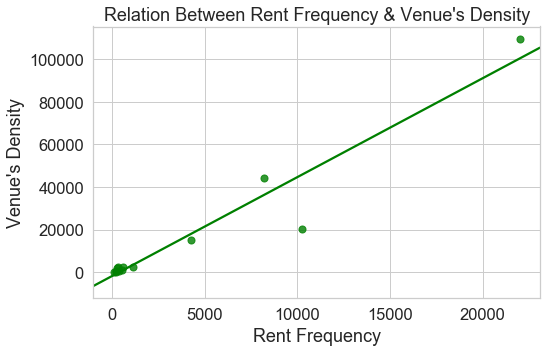

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

sns.set(font_scale=1.5)
sns.set_style('whitegrid')

ax = sns.regplot(x="Venue's Density", y='Rent Frequency', data=rel, color='green', marker = '.', scatter_kws={'s': 200},ci=None)
ax.set(xlabel='Rent Frequency', ylabel="Venue's Density")
ax.set_title("Relation Between Rent Frequency & Venue's Density")

In [50]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[6:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [51]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# Crear un nuevo dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = mx_grouped['Neighborhood']

for ind in np.arange(mx_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(mx_grouped.iloc[ind, :], num_top_venues)

In [52]:
neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Azcapotzalco,Mexican Restaurant,Taco Place,Bakery,Restaurant,Ice Cream Shop
1,Benito Juárez,Mexican Restaurant,Coffee Shop,Taco Place,Seafood Restaurant,Bakery
2,Coyoacán,Mexican Restaurant,Taco Place,Coffee Shop,Café,Ice Cream Shop
3,Cuajimalpa de Morelos,Mexican Restaurant,Coffee Shop,Taco Place,Ice Cream Shop,Pizza Place
4,Cuauhtémoc,Mexican Restaurant,Taco Place,Coffee Shop,Restaurant,Ice Cream Shop


## Modeling

In [53]:
from sklearn.cluster import KMeans

# Número de grupos
kclusters = 5

mx_grouped_clustering = mx_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(mx_grouped_clustering)

# verificar las etiquetas de clúster generadas para cada fila en el marco de datos
kmeans.labels_[0:10]

array([0, 3, 4, 0, 1, 0, 0, 0, 0, 2])

In [54]:
# Etiquetas por grupos
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

mx_merged = air
mx_merged = mx_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

mx_merged.head()

,Neighborhood,Latitude,Longitude,Price(MXN),Rent Frequency,Entire home/apt,Private room,Shared room,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
8080,Cuauhtémoc,19.42388,-99.15489,1396,32,1,0,0,1,Mexican Restaurant,Taco Place,Coffee Shop,Restaurant,Ice Cream Shop
12395,Tlalpan,19.31051,-99.22104,5200,3,1,0,0,0,Mexican Restaurant,Taco Place,Coffee Shop,Restaurant,Seafood Restaurant
9320,Venustiano Carranza,19.42223,-99.09048,459,11,0,1,0,0,Mexican Restaurant,Taco Place,Shared room,Convenience Store,Pizza Place
5574,Cuauhtémoc,19.43541,-99.14493,822,5,1,0,0,1,Mexican Restaurant,Taco Place,Coffee Shop,Restaurant,Ice Cream Shop
155,Cuauhtémoc,19.42984,-99.16936,956,10,1,0,0,1,Mexican Restaurant,Taco Place,Coffee Shop,Restaurant,Ice Cream Shop


In [56]:
import matplotlib.cm as cm
import matplotlib.colors as colors

# Creación del mapa
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# Establecer colores para los clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# Agregar colores al mapa
markers_colors = []
for lat, lon, poi, cluster in zip(mx_merged['Latitude'], mx_merged['Longitude'], mx_merged['Neighborhood'], mx_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster+1), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Examine Clusters

In [57]:
import matplotlib.pyplot as plt

# Cluster 1

In [58]:
c1 = mx_merged.loc[mx_merged['Cluster Labels'] == 0, mx_merged.columns[[0] + list(range(3, mx_merged.shape[1]))]].merge(v,on='Neighborhood')
col = list(c1.columns[:3]) + [c1.columns[-1]] + list(c1.columns[3:-1]) 
c1 = c1[col]
print(c1.shape)
c1.head()

(95, 13)


,Neighborhood,Price(MXN),Rent Frequency,Venue's Density,Entire home/apt,Private room,Shared room,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Tlalpan,5200,3,1128,1,0,0,0,Mexican Restaurant,Taco Place,Coffee Shop,Restaurant,Seafood Restaurant
1,Tlalpan,994,2,1128,0,1,0,0,Mexican Restaurant,Taco Place,Coffee Shop,Restaurant,Seafood Restaurant
2,Tlalpan,478,1,1128,0,1,0,0,Mexican Restaurant,Taco Place,Coffee Shop,Restaurant,Seafood Restaurant
3,Tlalpan,2600,4,1128,0,1,0,0,Mexican Restaurant,Taco Place,Coffee Shop,Restaurant,Seafood Restaurant
4,Tlalpan,497,1,1128,0,1,0,0,Mexican Restaurant,Taco Place,Coffee Shop,Restaurant,Seafood Restaurant


In [59]:
c1g = c1.groupby('Neighborhood').agg({'Price(MXN)':'mean',"Venue's Density":'max', 'Rent Frequency' :'sum','Entire home/apt' :'sum','Private room' :'sum','Shared room' :'sum'})
c1g

,Price(MXN),Venue's Density,Rent Frequency,Entire home/apt,Private room,Shared room
Neighborhood,,,,,,
Azcapotzalco,1097.571429,386,10,5,2,0
Cuajimalpa de Morelos,1096.875000,514,16,6,2,0
Gustavo A. Madero,275.400000,326,29,0,4,1
Iztacalco,3326.250000,255,20,3,1,0
Iztapalapa,216.666667,89,7,0,3,0
La Magdalena Contreras,549.500000,189,7,1,3,0
Tlalpan,974.950000,1128,50,6,14,0
Venustiano Carranza,468.300000,568,37,5,4,1
Xochimilco,481.800000,203,10,2,3,0


# Cluster 2

In [60]:
c2 = mx_merged.loc[mx_merged['Cluster Labels'] == 1, mx_merged.columns[[0] + list(range(3, mx_merged.shape[1]))]].merge(v,on='Neighborhood')
c2 = c2[col]
print(c2.shape)
c2.head()

(224, 13)


,Neighborhood,Price(MXN),Rent Frequency,Venue's Density,Entire home/apt,Private room,Shared room,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Cuauhtémoc,1396,32,21995,1,0,0,1,Mexican Restaurant,Taco Place,Coffee Shop,Restaurant,Ice Cream Shop
1,Cuauhtémoc,822,5,21995,1,0,0,1,Mexican Restaurant,Taco Place,Coffee Shop,Restaurant,Ice Cream Shop
2,Cuauhtémoc,956,10,21995,1,0,0,1,Mexican Restaurant,Taco Place,Coffee Shop,Restaurant,Ice Cream Shop
3,Cuauhtémoc,401,3,21995,0,1,0,1,Mexican Restaurant,Taco Place,Coffee Shop,Restaurant,Ice Cream Shop
4,Cuauhtémoc,421,11,21995,0,1,0,1,Mexican Restaurant,Taco Place,Coffee Shop,Restaurant,Ice Cream Shop


In [61]:
c2g = c2.groupby('Neighborhood').agg({'Price(MXN)':'mean', "Venue's Density":'max','Rent Frequency' :'sum','Entire home/apt' :'sum','Private room' :'sum','Shared room' :'sum'})
c2g

,Price(MXN),Venue's Density,Rent Frequency,Entire home/apt,Private room,Shared room
Neighborhood,,,,,,
Cuauhtémoc,1565.620536,21995,1101,126,92,6


# Cluster 3

In [62]:
c3 = mx_merged.loc[mx_merged['Cluster Labels'] == 2, mx_merged.columns[[0] + list(range(3, mx_merged.shape[1]))]].merge(v,on='Neighborhood')
c3 = c3[col]
print(c3.shape)
c3.head()

(91, 13)


,Neighborhood,Price(MXN),Rent Frequency,Venue's Density,Entire home/apt,Private room,Shared room,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Miguel Hidalgo,1090,1,8190,1,0,0,2,Mexican Restaurant,Coffee Shop,Taco Place,Restaurant,Ice Cream Shop
1,Miguel Hidalgo,401,9,8190,0,1,0,2,Mexican Restaurant,Coffee Shop,Taco Place,Restaurant,Ice Cream Shop
2,Miguel Hidalgo,2485,33,8190,1,0,0,2,Mexican Restaurant,Coffee Shop,Taco Place,Restaurant,Ice Cream Shop
3,Miguel Hidalgo,382,1,8190,0,1,0,2,Mexican Restaurant,Coffee Shop,Taco Place,Restaurant,Ice Cream Shop
4,Miguel Hidalgo,593,1,8190,0,1,0,2,Mexican Restaurant,Coffee Shop,Taco Place,Restaurant,Ice Cream Shop


In [63]:
c3g = c3.groupby('Neighborhood').agg({'Price(MXN)':'mean', "Venue's Density":'max', 'Rent Frequency' :'sum','Entire home/apt' :'sum','Private room' :'sum','Shared room' :'sum'})
c3g

,Price(MXN),Venue's Density,Rent Frequency,Entire home/apt,Private room,Shared room
Neighborhood,,,,,,
Miguel Hidalgo,1341.098901,8190,487,54,35,2


## Cluster 4

In [64]:
c4 = mx_merged.loc[mx_merged['Cluster Labels'] == 3, mx_merged.columns[[0] + list(range(3, mx_merged.shape[1]))]].merge(v,on='Neighborhood')
c4 = c4[col]
print(c4.shape)
c4.head()

(105, 13)


,Neighborhood,Price(MXN),Rent Frequency,Venue's Density,Entire home/apt,Private room,Shared room,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Benito Juárez,803,1,10267,0,1,0,3,Mexican Restaurant,Coffee Shop,Taco Place,Seafood Restaurant,Bakery
1,Benito Juárez,478,1,10267,0,1,0,3,Mexican Restaurant,Coffee Shop,Taco Place,Seafood Restaurant,Bakery
2,Benito Juárez,344,1,10267,0,1,0,3,Mexican Restaurant,Coffee Shop,Taco Place,Seafood Restaurant,Bakery
3,Benito Juárez,325,1,10267,0,1,0,3,Mexican Restaurant,Coffee Shop,Taco Place,Seafood Restaurant,Bakery
4,Benito Juárez,249,1,10267,0,1,0,3,Mexican Restaurant,Coffee Shop,Taco Place,Seafood Restaurant,Bakery


In [65]:
c4g = c4.groupby('Neighborhood').agg({'Price(MXN)':'mean', "Venue's Density":'max', 'Rent Frequency' :'sum','Entire home/apt' :'sum','Private room' :'sum','Shared room' :'sum'})
c4g

,Price(MXN),Venue's Density,Rent Frequency,Entire home/apt,Private room,Shared room
Neighborhood,,,,,,
Benito Juárez,880.695238,10267,209,42,62,1


## Cluster 5

In [66]:
c5 = mx_merged.loc[mx_merged['Cluster Labels'] == 4, mx_merged.columns[[0] + list(range(3, mx_merged.shape[1]))]].merge(v,on='Neighborhood')
c5 = c5[col]
print(c5.shape)
c5.head()

(56, 13)


,Neighborhood,Price(MXN),Rent Frequency,Venue's Density,Entire home/apt,Private room,Shared room,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Coyoacán,249,2,4265,0,1,0,4,Mexican Restaurant,Taco Place,Coffee Shop,Café,Ice Cream Shop
1,Coyoacán,497,17,4265,1,0,0,4,Mexican Restaurant,Taco Place,Coffee Shop,Café,Ice Cream Shop
2,Coyoacán,765,1,4265,1,0,0,4,Mexican Restaurant,Taco Place,Coffee Shop,Café,Ice Cream Shop
3,Coyoacán,191,1,4265,0,1,0,4,Mexican Restaurant,Taco Place,Coffee Shop,Café,Ice Cream Shop
4,Coyoacán,401,1,4265,1,0,0,4,Mexican Restaurant,Taco Place,Coffee Shop,Café,Ice Cream Shop


In [68]:
cg5 = c5.groupby('Neighborhood').agg({'Price(MXN)':'mean', "Venue's Density":'max', 'Rent Frequency' :'sum','Entire home/apt' :'sum','Private room' :'sum','Shared room' :'sum'})
cg5

,Price(MXN),Venue's Density,Rent Frequency,Entire home/apt,Private room,Shared room
Neighborhood,,,,,,
Coyoacán,617.142857,4265,181,17,38,1
